In [4]:
import pandas as pd
from plotnine import *
from datetime import datetime


df = pd.read_csv('StackedArea_Data.csv')

df['Date'] = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['Date']]
Sum_df = df.iloc[:, 1:].apply(
    lambda x: x.sum(), axis=0).sort_values(ascending=True)
melt_df = pd.melt(df, id_vars=["Date"],
                  var_name='variable', value_name='value')
melt_df['variable'] = pd.Categorical(melt_df['variable'], categories=Sum_df.index, ordered=True)

display(df, melt_df)


,Date,North_America,Africa,South_America,Asia,Europe
0,2002-06-30,23.0,7.9,7.9,13.2,9.3
1,2002-07-30,19.9,7.5,7.1,12.5,8.5
2,2002-08-30,21.0,7.9,7.6,12.5,8.0
3,2002-09-30,22.1,5.9,8.3,13.9,8.2
4,2002-10-30,25.1,6.1,9.4,14.4,10.7
...,...,...,...,...,...,...
110,2011-08-30,31.6,0.0,24.8,16.0,48.6
111,2011-09-30,31.5,4.5,18.4,15.4,42.8
112,2011-10-30,26.7,3.6,15.3,12.6,35.6
113,2011-11-30,27.3,3.9,15.0,13.0,35.3


,Date,variable,value
0,2002-06-30,North_America,23.0
1,2002-07-30,North_America,19.9
2,2002-08-30,North_America,21.0
3,2002-09-30,North_America,22.1
4,2002-10-30,North_America,25.1
...,...,...,...
570,2011-08-30,Europe,48.6
571,2011-09-30,Europe,42.8
572,2011-10-30,Europe,35.6
573,2011-11-30,Europe,35.3


## 图614堆积面积图.(a) 堆积面积图

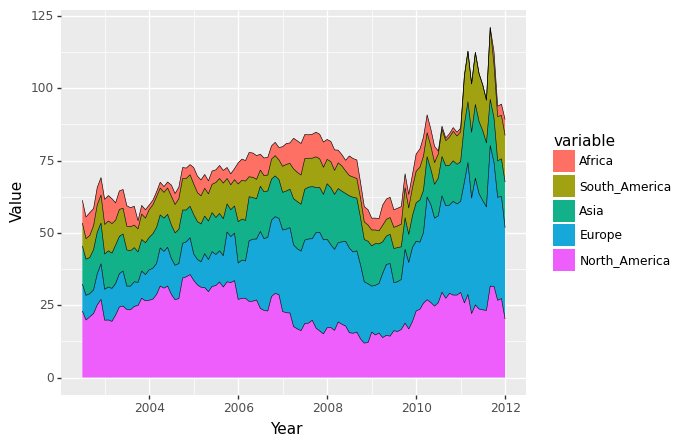

<ggplot: (148147348983)>


In [5]:
base_plot = (ggplot(melt_df, aes(x='Date', y='value', fill='variable', group='variable')) +
             geom_area(position="stack", alpha=1) +
             geom_line(position="stack", size=0.25, color="black") +
             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             scale_fill_hue(s=0.99, l=0.65, h=0.0417, color_space='husl') +
             xlab("Year") +
             ylab("Value") +
             theme(
    figure_size=(6, 5),
    dpi=100))

print(base_plot)
# base_plot.save("堆积面积图.pdf")


## 图614堆积面积图.  (b)百分比堆积面积图

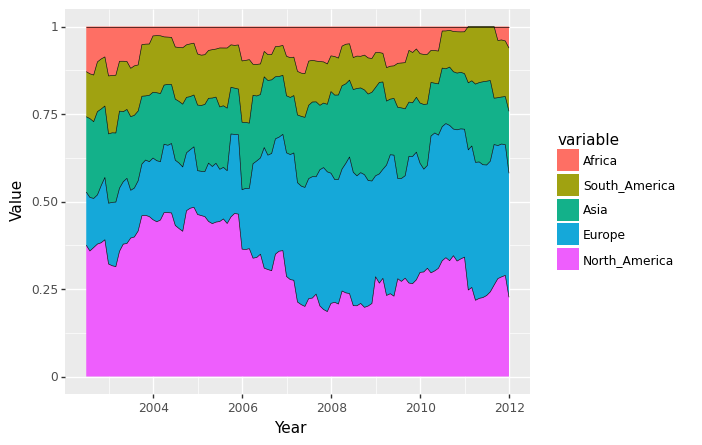

<ggplot: (148147414965)>


In [6]:
df = pd.read_csv('StackedArea_Data.csv')

df['Date'] = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['Date']]

SumRow_df = df.iloc[:, 1:].apply(lambda x: x.sum(), axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x/SumRow_df, axis=0)
meanCol_df = df.iloc[:, 1:].apply(
    lambda x: x.mean(), axis=0).sort_values(ascending=True)
melt_df = pd.melt(df, id_vars=["Date"],
                  var_name='variable', value_name='value')
melt_df['variable'] = pd.Categorical(melt_df['variable'], categories=meanCol_df.index, ordered=True)

base_plot = (ggplot(melt_df, aes(x='Date', y='value', fill='variable', group='variable')) +
             geom_area(position="fill", alpha=1) +
             geom_line(position="fill", size=0.25, color="black") +
             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             scale_fill_hue(s=0.99, l=0.65, h=0.0417, color_space='husl') +
             xlab("Year") +
             ylab("Value") +
             theme(
    figure_size=(6, 5),
    dpi=100))

print(base_plot)
# base_plot.save("堆积面积图2.pdf")
